In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import shutil

In [2]:
data_dir ='/kaggle/input/american-sign-language-asl/ASL'
class_names = os.listdir(data_dir)
num_classes = len(class_names)
image_files = [[os.path.join(data_dir, class_name, x)
               for x in os.listdir(os.path.join(data_dir, class_name))]
               for class_name in class_names]

In [3]:
features = []
labels = []
for i, class_name in enumerate(class_names):
    features.extend(image_files[i])
    labels.extend([i]* len(image_files[i]))
num_total = len(labels)    

In [4]:
print("Dataset Feature size : ",len(features))
print("Dataset labels size : ",len(labels))

# Shuffle 
features,labels =shuffle(features,labels,random_state=20)

Dataset Feature size :  203000
Dataset labels size :  203000


In [5]:
# Append data into X,y
X = []
y = []
for i in features:
    image = cv2.resize(cv2.imread(i, cv2.IMREAD_COLOR),(64,64))
    X.append(image)
for i in labels:
    y.append(i)

In [6]:
X = np.array(X)
y = np.array(y)
y = np.array(labels)
#y= np.reshape(y,(y.shape[0]))
print("The shape of X_train is : ", X.shape)
print("The shape of y_train is : ", y.shape)

The shape of X_train is :  (203000, 64, 64, 3)
The shape of y_train is :  (203000,)


In [7]:
print("The shape of one image is : ", X[0].shape)

The shape of one image is :  (64, 64, 3)


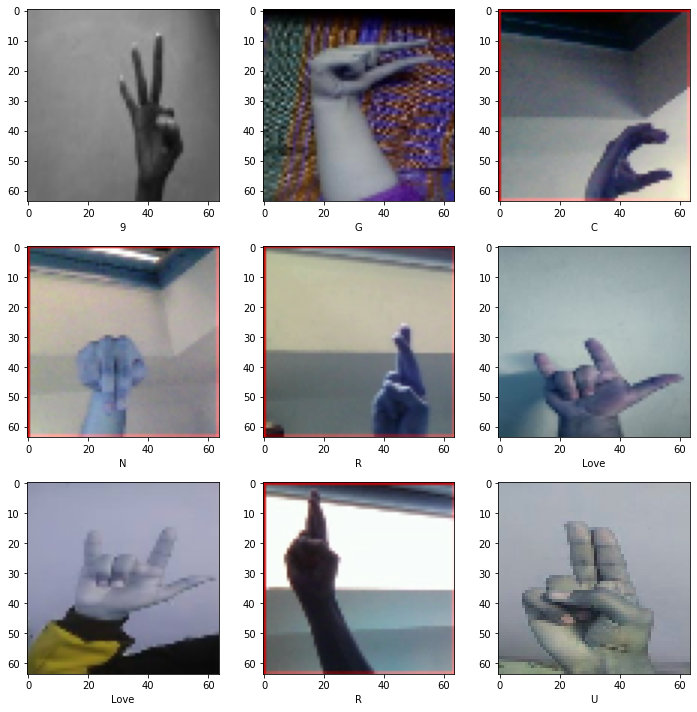

In [8]:
plt.subplots(3,3, figsize=(10,10))
for i,k in enumerate(np.random.randint(num_total, size=9)):
    plt.subplot(3,3, i+1)
    plt.xlabel(class_names[labels[k]])
    plt.imshow(X[k], cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()

In [9]:
X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
X_test, X_valid, y_test, y_valid = train_test_split(X_split, y_split, test_size=0.50, random_state=42)

In [11]:
y_train = to_categorical(y_train, num_classes )
y_test = to_categorical(y_test, num_classes)
y_valid = to_categorical(y_valid, num_classes )

In [12]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape = (64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))


model.add(Dense(num_classes, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0

In [13]:
#define early stopping
early_stopping = EarlyStopping(monitor = 'val_loss',patience = 5)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#model training
asl_model = model.fit(X_train, y_train,epochs=50,batch_size=128,verbose=2,validation_data=(X_valid, y_valid),callbacks=[early_stopping])
model.save("./ASL.hdf5")
model.save("./ASL.h5")

Epoch 1/50
1111/1111 - 18s - loss: 2.3314 - accuracy: 0.3859 - val_loss: 0.9365 - val_accuracy: 0.7286
Epoch 2/50
1111/1111 - 10s - loss: 1.0827 - accuracy: 0.6711 - val_loss: 0.5568 - val_accuracy: 0.8375
Epoch 3/50
1111/1111 - 10s - loss: 0.8007 - accuracy: 0.7526 - val_loss: 0.3866 - val_accuracy: 0.8857
Epoch 4/50
1111/1111 - 10s - loss: 0.6629 - accuracy: 0.7941 - val_loss: 0.2909 - val_accuracy: 0.9163
Epoch 5/50
1111/1111 - 10s - loss: 0.5764 - accuracy: 0.8219 - val_loss: 0.2731 - val_accuracy: 0.9209
Epoch 6/50
1111/1111 - 10s - loss: 0.5197 - accuracy: 0.8374 - val_loss: 0.2252 - val_accuracy: 0.9361
Epoch 7/50
1111/1111 - 10s - loss: 0.4646 - accuracy: 0.8560 - val_loss: 0.2407 - val_accuracy: 0.9337
Epoch 8/50
1111/1111 - 10s - loss: 0.4383 - accuracy: 0.8647 - val_loss: 0.1898 - val_accuracy: 0.9429
Epoch 9/50
1111/1111 - 10s - loss: 0.4045 - accuracy: 0.8757 - val_loss: 0.1668 - val_accuracy: 0.9544
Epoch 10/50
1111/1111 - 10s - loss: 0.3831 - accuracy: 0.8817 - val_loss:

In [15]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

952/952 [==============================] - 2s 3ms/step - loss: 0.0771 - accuracy: 0.9785
Test results - Loss: 0.07713638991117477 - Accuracy: 97.8489339351654%


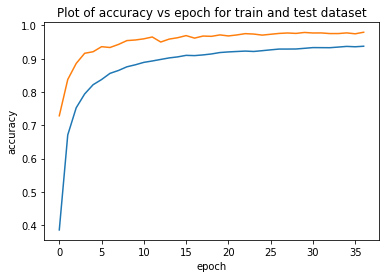

In [16]:
plt.plot(asl_model.history['accuracy'])
plt.plot(asl_model.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

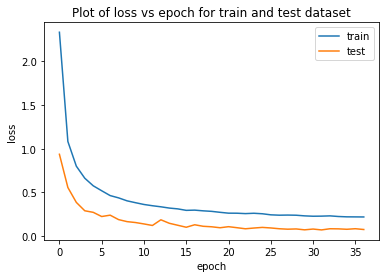

In [17]:
# Plot of loss vs epoch for train and test dataset
plt.plot(asl_model.history['loss'])
plt.plot(asl_model.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## User Input of Image Files
#### (Our Implementation)

In [20]:
class_names = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Sort the class names if needed (optional)
class_names.sort()

print(f"Class names: {class_names}")

Class names: ['1', '3', '4', '5', '7', '8', '9', 'A', 'B', 'Baby', 'Brother', 'C', 'D', 'Dont_like', 'E', 'F', 'Friend', 'G', 'H', 'Help', 'House', 'I', 'J', 'K', 'L', 'Like', 'Love', 'M', 'Make', 'More', 'N', 'Name', 'No', 'O_OR_0', 'P', 'Pay', 'Play', 'Q', 'R', 'S', 'Stop', 'T', 'U', 'V_OR_2', 'W_OR_6', 'With', 'X', 'Y', 'Yes', 'Z', 'nothing']


In [21]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load pre-trained ASL model
model = load_model('./ASL.h5')

def predict_alphabet(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return "Invalid image path."

    # Preprocess the image
    img_resized = cv2.resize(img, (64, 64))
    img_resized = img_resized / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)

    # Predict
    prediction = model.predict(img_resized)
    predicted_index = np.argmax(prediction)
    return class_names[predicted_index]
    #return predicted_index

# Ask for input image path
image_path = input("Enter the path to the ASL image: ")
result = predict_alphabet(image_path)
print(f"Predicted Alphabet: {result}")

#Example Input: /kaggle/input/sample-asl/Sample-ASL/Sample1.jpg


Enter the path to the ASL image:  /kaggle/input/sample-asl/Sample-ASL/Sample1.jpg


Predicted Alphabet: Pay
